In [1]:
 # use this code to connect to google drive  fromm
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


data
https://www.kaggle.com/datasets/volodymyrpivoshenko/brain-mri-scan-images-tumor-detection/code

In [3]:
# libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers


#1- Load Data


In [ ]:
# path  data
path = '/content/drive/MyDrive/new projects ai /brain_mri_scan_images'
# go to the path of the data and show the list of file in the path
%cd {path}
!ls

In [6]:
# load name of images and sort it
negative_images = os.listdir('./negative')
positive_images = os.listdir('./positive')
negative_images.sort()
positive_images.sort()

In [8]:
#load the images data
negative_images_dir = ['./negative/{}'.format(image) for image in negative_images]
positive_images_dir = ['./positive/{}'.format(image) for image in positive_images]
print(len(negative_images_dir),len(positive_images_dir))

98 129


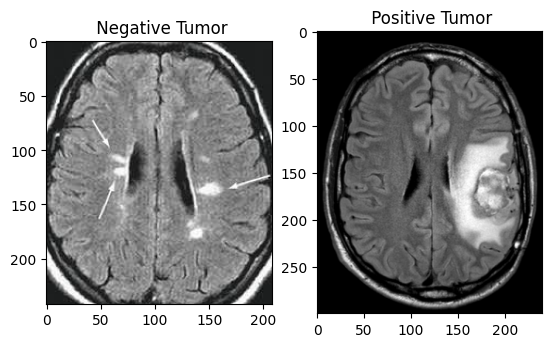

In [9]:
# plot the image from the negative & positive
plt.subplot(121)
image= cv2.imread(negative_images_dir[0])
plt.title(' Negative Tumor')
plt.imshow(image)
plt.subplot(122)
image= cv2.imread(positive_images_dir[0])
plt.imshow(image)
plt.title(' Positive Tumor')
plt.show()

In [10]:
all_images= negative_images_dir +positive_images_dir
all_images[0:98]

['./negative/0.jpg',
 './negative/1.jpg',
 './negative/10.jpg',
 './negative/11.jpg',
 './negative/12.jpg',
 './negative/13.jpg',
 './negative/14.jpg',
 './negative/15.jpg',
 './negative/16.jpg',
 './negative/17.jpg',
 './negative/18.jpg',
 './negative/19.jpg',
 './negative/2.jpg',
 './negative/20.jpg',
 './negative/21.jpg',
 './negative/22.jpg',
 './negative/23.jpg',
 './negative/24.jpg',
 './negative/25.jpg',
 './negative/26.jpg',
 './negative/27.jpg',
 './negative/28.jpg',
 './negative/29.jpg',
 './negative/3.jpg',
 './negative/30.jpg',
 './negative/31.jpg',
 './negative/32.jpg',
 './negative/33.jpg',
 './negative/34.jpg',
 './negative/35.jpg',
 './negative/36.jpg',
 './negative/37.jpg',
 './negative/38.jpg',
 './negative/39.jpg',
 './negative/4.jpg',
 './negative/40.jpg',
 './negative/41.jpg',
 './negative/42.jpg',
 './negative/43.jpg',
 './negative/44.jpg',
 './negative/45.jpg',
 './negative/46.jpg',
 './negative/47.jpg',
 './negative/48.jpg',
 './negative/49.jpg',
 './negative/5.

#2- pre train

In [11]:
# to know the common size (shape image )
size = []
for n in range(len(all_images)):
        image = plt.imread(all_images[n])
        size.append(image.shape)

pd.Series(size).value_counts()

(225, 225, 3)    17
(630, 630, 3)     7
(325, 300)        4
(251, 201, 3)     4
(217, 232, 3)     3
                 ..
(1427, 1275)      1
(323, 276, 3)     1
(879, 766, 3)     1
(316, 270, 3)     1
(233, 215, 3)     1
Length: 171, dtype: int64

In [12]:
# initializing value
BATCH_SIZE = 8
IMAGE_SIZE = 225
CHANNELS=3
EPOCHS=50

In [13]:
# load images  by tf  keras
dataset =tf.keras.preprocessing.image_dataset_from_directory(path,
    seed=20,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 227 files belonging to 2 classes.


In [14]:
len(dataset)


29

In [15]:
#  function to split data (train , test, validation)
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [16]:
# split data
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [17]:
len(train_ds),len(val_ds),len(test_ds)

(23, 2, 4)

In [18]:
# normalization data
# resize & rescale
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])


In [19]:
# data augmentation (ImageDataGenerator)
#data_augmentation = tf.keras.Sequential([
 # layers.RandomFlip("horizontal_and_vertical"),
 # layers.RandomRotation(0.2),
#])
#train_ds = train_ds.map(
#    lambda x, y: (data_augmentation(x, training=True), y)).prefetch(buffer_size=tf.data.AUTOTUNE)

# build model

In [20]:
# bulid the CNN (Neural Network )
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(dataset.class_names)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(128, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (8, 225, 225, 3)          0         
                                                                 
 conv2d (Conv2D)             (8, 223, 223, 128)        3584      
                                                                 
 max_pooling2d (MaxPooling2  (8, 111, 111, 128)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (8, 109, 109, 128)        147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (8, 54, 54, 128)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (8, 52, 52, 64)          

#3- Training

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
#train CNN
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=2,
    epochs=10,
)

Epoch 1/10
23/23 - 78s - loss: 0.6904 - accuracy: 0.5866 - val_loss: 0.7015 - val_accuracy: 0.5625 - 78s/epoch - 3s/step
Epoch 2/10
23/23 - 69s - loss: 0.5952 - accuracy: 0.7374 - val_loss: 0.5300 - val_accuracy: 0.7500 - 69s/epoch - 3s/step
Epoch 3/10
23/23 - 70s - loss: 0.4830 - accuracy: 0.7654 - val_loss: 0.3736 - val_accuracy: 0.9091 - 70s/epoch - 3s/step
Epoch 4/10
23/23 - 70s - loss: 0.4219 - accuracy: 0.8436 - val_loss: 0.4784 - val_accuracy: 0.8125 - 70s/epoch - 3s/step
Epoch 5/10
23/23 - 71s - loss: 0.3877 - accuracy: 0.8436 - val_loss: 0.1678 - val_accuracy: 0.8750 - 71s/epoch - 3s/step
Epoch 6/10
23/23 - 70s - loss: 0.2890 - accuracy: 0.8859 - val_loss: 0.2281 - val_accuracy: 0.9375 - 70s/epoch - 3s/step
Epoch 7/10
23/23 - 70s - loss: 0.1563 - accuracy: 0.9553 - val_loss: 0.1293 - val_accuracy: 1.0000 - 70s/epoch - 3s/step
Epoch 8/10
23/23 - 71s - loss: 0.1020 - accuracy: 0.9837 - val_loss: 0.0187 - val_accuracy: 1.0000 - 71s/epoch - 3s/step
Epoch 9/10
23/23 - 68s - loss: 0

# 4- test

In [24]:
# acuuracy of the test
scores = model.evaluate(test_ds)


4/4 [==============================] - 4s 752ms/step - loss: 0.0133 - accuracy: 1.0000


In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
acc

[0.5865921974182129,
 0.7374301552772522,
 0.7653631567955017,
 0.8435754179954529,
 0.8435754179954529,
 0.885869562625885,
 0.9553072452545166,
 0.9836956262588501,
 0.9888268113136292,
 1.0]

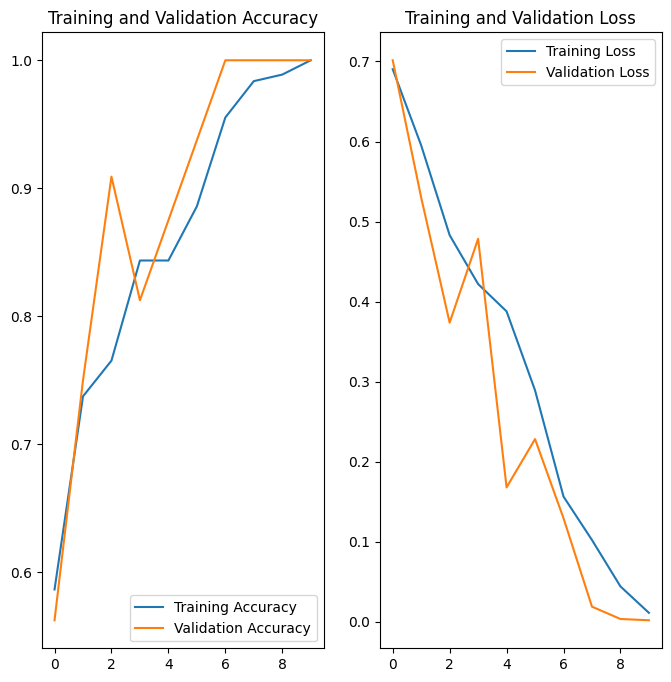

In [27]:
# show the  training & validation (accuracy & loss)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
# class names
class_names = dataset.class_names
class_names

['negative', 'positive']

first image to predict
actual label: positive
1/1 [==============================] - 2s 2s/step
predicted label: negative


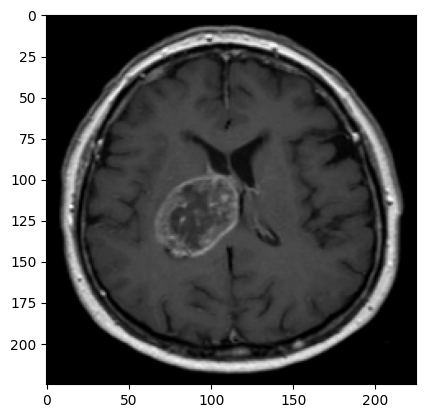

In [29]:
# the first image prdiction  vs the actual
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)

    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class =class_names[int(np.round(predictions[0]))]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 101ms/step


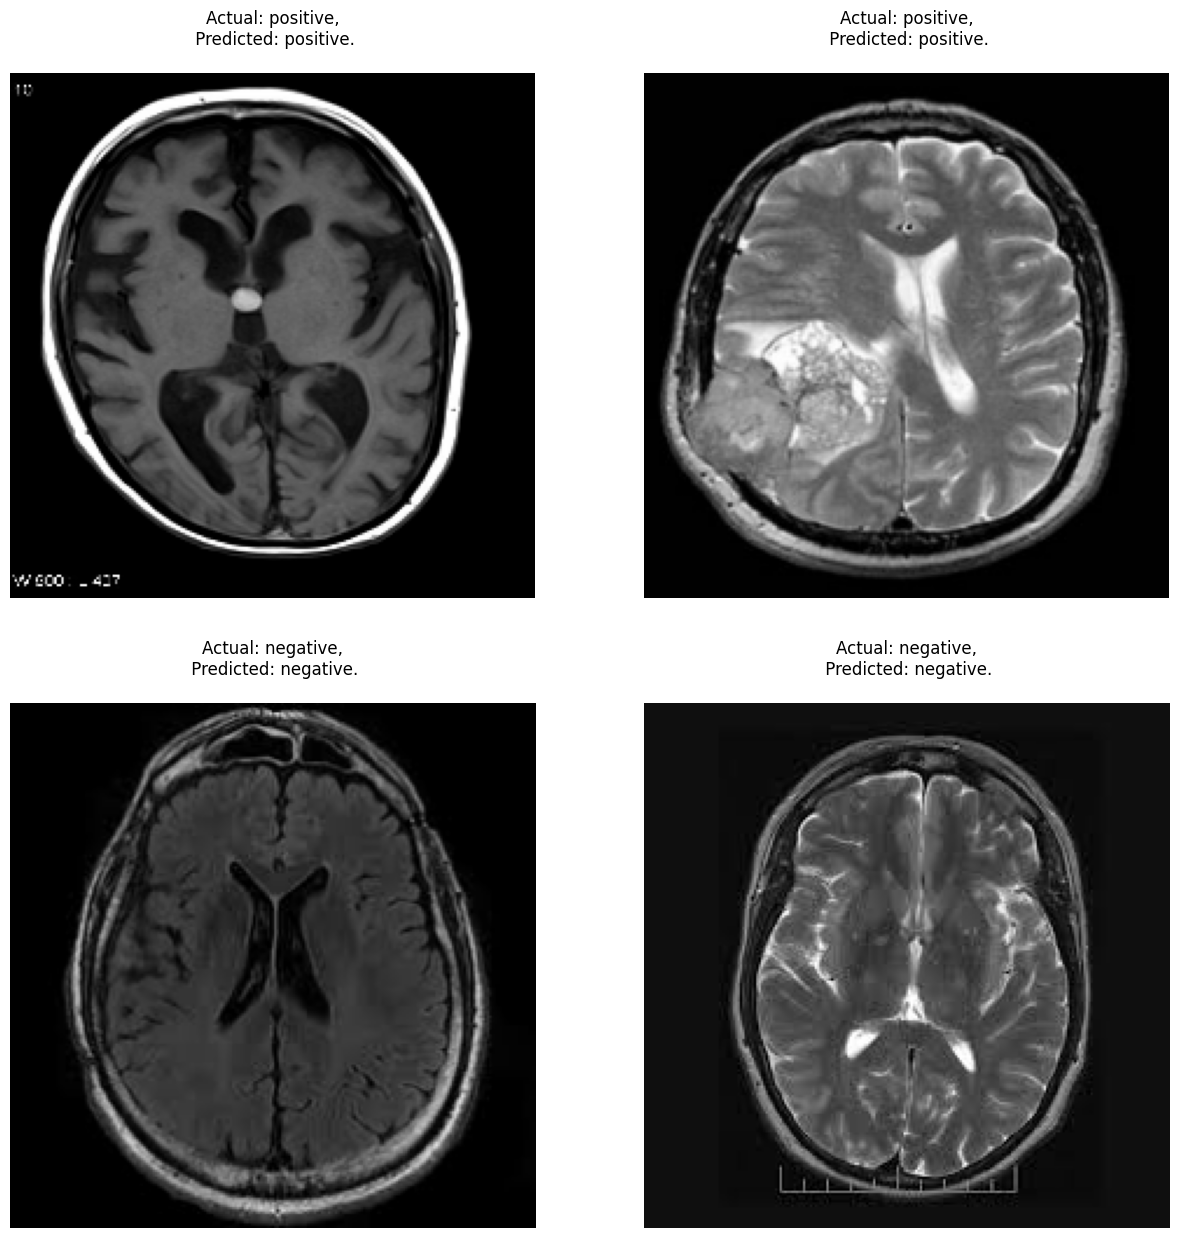

In [31]:
# show some of image  ( the prediction  vs actual )& the confidence
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n")

        plt.axis("off")

In [32]:
# save model
model.save("brain_Tumor.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
